Catboost Alg. 

In [2]:
!pip install catboost

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.metrics import classification_report
from optuna.samplers import TPESampler

Importing Dataset

In [4]:
df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Delimitate Data

In [5]:
y = df['stroke']
X  = df
X.drop('stroke', axis=1, inplace=True) 
X.drop('id', axis=1, inplace=True) 

Split to train & test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=67)
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1203,Male,21.0,0,0,No,Private,Urban,82.71,20.1,formerly smoked
2100,Female,52.0,0,0,Yes,Private,Urban,93.14,32.5,never smoked
4597,Female,29.0,0,0,Yes,Private,Rural,108.14,25.1,formerly smoked
4315,Female,28.0,0,0,Yes,Private,Urban,100.80,39.3,formerly smoked
752,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown


Features

In [7]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type',
            'smoking_status']

Preprocessing

In [8]:
preprocessors = [SimpleImputer(strategy='mean'), StandardScaler()]

for p in preprocessors:
    X_train[numerical_features] = p.fit_transform(X_train[numerical_features])
    X_test[numerical_features] = p.transform(X_test[numerical_features])


Hypertuning: GridSearch

In [9]:
# cb = CatBoostClassifier(cat_features=categorical_features)
# grid = {'max_depth':[3,5,7,9], 'n_estimators':[100]}
# gridCV = GridSearchCV(estimator = cb, 
#                     param_grid = grid,
#                     scoring = 'f1',
#                     cv = 5)
# gridCV.fit(X_train, y_train)
# print("Estimator:", gridCV.best_estimator_)
# print("Score:", gridCV.best_score_)
# print("Params:", gridCV.best_params_)

Hypertuning: RandomSearch

In [10]:
# # imports
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform as sp_randFloat
# from scipy.stats import randint as sp_randInt

# # how it works: total scores of different predictors are being averaged 
# cb = CatBoostClassifier(cat_features=categorical_features)
# parameters ={
#     'depth': sp_randInt(4,10),
#     'learning_rate': sp_randFloat(),
#     'iterations': sp_randInt(10,100)
# }

# randSearch = RandomizedSearchCV(
#     estimator = cb,
#     param_distributions = parameters,
#     cv = 2,
#     n_iter = 10,
#     n_jobs = -1,
#     scoring = 'f1'
# )

# randSearch.fit(X_train, y_train)
# print("RESULTS:")
# print("Best estimators:", randSearch.best_estimator_)
# print("Best score:", randSearch.best_score_)
# print("Best parameters:", randSearch.best_params_)

Hypertuning: Optuna framework

In [11]:
!pip install optuna

Model Evaluation: before hypertuning

In [12]:
cat_model = CatBoostClassifier(task_type='GPU', 
                               iterations=1000, 
                               random_state=67, 
                               eval_metric="F1", 
                               class_weights = {0:0.08457286432160804, 1: 0.915427135678392},
                               learning_rate = 0.1
                               )
cat_model.fit(X_train, y_train, cat_features = categorical_features, plot=True, eval_set=(X_test, y_test))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7424898	test: 0.6403437	best: 0.6403437 (0)	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.7723418	test: 0.6479700	best: 0.6479700 (1)	total: 121ms	remaining: 1m
2:	learn: 0.7672969	test: 0.6531481	best: 0.6531481 (2)	total: 183ms	remaining: 1m
3:	learn: 0.7643338	test: 0.6570616	best: 0.6570616 (3)	total: 238ms	remaining: 59.2s
4:	learn: 0.7607105	test: 0.6530886	best: 0.6570616 (3)	total: 289ms	remaining: 57.5s
5:	learn: 0.7719998	test: 0.6290006	best: 0.6570616 (3)	total: 344ms	remaining: 57.1s
6:	learn: 0.7698550	test: 0.6468950	best: 0.6570616 (3)	total: 418ms	remaining: 59.3s
7:	learn: 0.7767608	test: 0.6203088	best: 0.6570616 (3)	total: 478ms	remaining: 59.2s
8:	learn: 0.7771965	test: 0.6153361	best: 0.6570616 (3)	total: 543ms	remaining: 59.8s
9:	learn: 0.7819604	test: 0.6129767	best: 0.6570616 (3)	total: 618ms	remaining: 1m 1s
10:	learn: 0.7896794	test: 0.6226894	best: 0.6570616 (3)	total: 809ms	remaining: 1m 12s
11:	learn: 0.7940681	test: 0.6133385	best: 0.6570616 (3)	

In [13]:
y_pred = cat_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      3255
           1       0.16      0.64      0.26       169

    accuracy                           0.82      3424
   macro avg       0.57      0.73      0.58      3424
weighted avg       0.94      0.82      0.87      3424

F1 Score: 0.25806451612903225
Accuracy: 0.8186331775700935
Precision: 0.16167664670658682
Recall: 0.6390532544378699


Find best hyperparameters

In [14]:
def objective(trial):

    model = CatBoostClassifier(
        cat_features=categorical_features,
        class_weights = {0:0.08457286432160804, 1: 0.915427135678392},
        task_type=trial.suggest_categorical("task_type", ["GPU", "CPU"]),
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print(f"Trial #{trial.number}: F1={f1}, Acc={acc}, Prec={prec}, Rec={rec}")
    return f1

Create the study

In [15]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
try:
    study.optimize(objective, n_trials=100) 
except:
    pass

NameError: name 'optuna' is not defined

Evaluate trial

In [ ]:
if len(study.trials) > 0:
    print("Best trial:")
    trial = study.best_trial
    print("  Value: ", trial.value)
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
else:
    print("No trials completed yet.")

Best trial:
  Value:  0.2782324058919804
  Params: 
    task_type: CPU
    iterations: 223
    learning_rate: 0.0026949196404301595
    depth: 5
    l2_leaf_reg: 9.71429281395082e-06
    bootstrap_type: Bayesian
    random_strength: 7.336336453824642
    bagging_temperature: 5.754277968910409
    od_type: Iter
    od_wait: 24


Hypertuned fitting of the model

In [ ]:
model = CatBoostClassifier(**trial.params, verbose=False, cat_features = categorical_features, class_weights = {0:0.08457286432160804, 1: 0.915427135678392},)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Final results

In [ ]:
print(classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3255
           1       0.19      0.50      0.28       169

    accuracy                           0.87      3424
   macro avg       0.58      0.70      0.60      3424
weighted avg       0.93      0.87      0.90      3424

F1 Score: 0.2782324058919804
Accuracy: 0.8712032710280374
Precision: 0.19230769230769232
Recall: 0.5029585798816568


In [ ]:
trial.params


{'task_type': 'CPU',
 'iterations': 223,
 'learning_rate': 0.0026949196404301595,
 'depth': 5,
 'l2_leaf_reg': 9.71429281395082e-06,
 'bootstrap_type': 'Bayesian',
 'random_strength': 7.336336453824642,
 'bagging_temperature': 5.754277968910409,
 'od_type': 'Iter',
 'od_wait': 24}

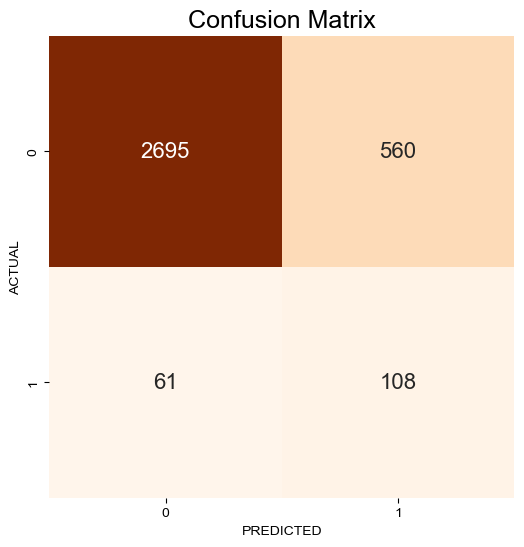

In [17]:
from sklearn.metrics import confusion_matrix,f1_score
def conf_matrix(y_test,pred):
    #creating a confusion matrix
    conf_mat = confusion_matrix(y_test,y_pred)
    conf_mat = pd.DataFrame(conf_mat, range(2), range(2))
    #ploting 
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    sns.set(font_scale=1.5)
    sns.heatmap(conf_mat, annot=True, annot_kws={"size":16}, fmt='g',cmap=plt.cm.Oranges, cbar=False)
    #labels
    ax.set_xlabel('PREDICTED')
    ax.set_ylabel('ACTUAL')
    ax.set_title('Confusion Matrix')
    plt.show()

conf_matrix(y_test,y_pred)

In [ ]:
# store in pickle